# pandas の基本
2016年の堺市の月別気温のデータを使って説明する

参考
-[pandas.DataFrame の列の抽出（射影）および行の抽出（選択）方法まとめ](http://akiyoko.hatenablog.jp/entry/2017/04/03/081630#3-1)
-[pandas の loc、iloc、ix の違い](http://ailaby.com/lox_iloc_ix/)
-[reset_index](http://ailaby.com/reset_index/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Web上の表の取り込み

In [2]:
url = "http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_a1.php?prec_no=62&block_no=1062&year=2016&month=&day=&view=a2"

![表の例](https://gist.githubusercontent.com/aquapathos/f49a8c322b28d259b2034f9ad2747c21/raw/0e2468b7eb594332e406ccd3f63c495afbafac8a/sakaitempdata.png)

In [3]:
df = pd.io.html.read_html(url) # urlで指定しtページのテーブルデータを読み込む

In [4]:
tempdataAll = df[0] # 最初の表が気温データ
tempdata = tempdataAll[3:] #3行目から下だけ抽出
tempdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3,1,6.6,10.5,2.3,16.2,04 12:26,-2.1,24 23:42,21,1,0,4,0,0,0,0.0,0.0
4,2,7.1,11.6,2.6,20.1,14 02:17,-1.4,18 04:58,40,0,0,7,0,0,0,0.0,0.0
5,3,10.4,15.7,5.3,22.0,31 13:38,0.3,01 05:05,188,0,0,0,0,0,0,0.0,0.0
6,4,16.1,21.0,11.5,27.1,17 13:05,3.5,12 05:02,484,0,0,0,0,0,2,0.0,0.0
7,5,20.5,25.9,15.4,30.5,23 15:02,10.6,18 03:53,637,0,0,0,0,0,22,1.0,0.0
8,6,23.0,27.5,19.1,31.5,18 14:14,12.2,03 05:13,691,0,6,0,0,0,24,5.0,0.0
9,7,27.8,32.4,24.2,35.5,30 12:55,21.1,01 03:09,862,0,30,0,10,0,31,28.0,2.0
10,8,29.3,34.9,25.3,37.4,19 13:39,20.7,30 00:45,909,0,29,0,22,0,31,29.0,21.0
11,9,25.4,29.8,22.0,34.2,07 13:20,18.7,30 06:06,762,0,20,0,0,0,29,16.0,0.0
12,10,20.2,24.9,16.0,31.7,08 14:00,8.3,30 05:10,626,0,2,0,0,0,15,2.0,0.0


## 特定列の取り出し

In [5]:
tempdata[1]

3      6.6
4      7.1
5     10.4
6     16.1
7     20.5
8     23.0
9     27.8
10    29.3
11    25.4
12    20.2
13    13.0
14     9.1
Name: 1, dtype: object

## 注意

In [6]:
tempdata[1:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4,2,7.1,11.6,2.6,20.1,14 02:17,-1.4,18 04:58,40,0,0,7,0,0,0,0.0,0.0
5,3,10.4,15.7,5.3,22.0,31 13:38,0.3,01 05:05,188,0,0,0,0,0,0,0.0,0.0
6,4,16.1,21.0,11.5,27.1,17 13:05,3.5,12 05:02,484,0,0,0,0,0,2,0.0,0.0


[1:4]は１行目から3行目までの意味になるという点に注意

## 複数の特定列の取り出し

In [7]:
tempdata[[1,2,3]]

,1,2,3
3,6.6,10.5,2.3
4,7.1,11.6,2.6
5,10.4,15.7,5.3
6,16.1,21.0,11.5
7,20.5,25.9,15.4
8,23.0,27.5,19.1
9,27.8,32.4,24.2
10,29.3,34.9,25.3
11,25.4,29.8,22.0
12,20.2,24.9,16.0


### 行番号、列番号は元の表のそれであることに注意

In [8]:
tempdata.loc[3:5,1:3]  # 月ごとの平均気温、最高気温、最低気温

,1,2,3
3,6.6,10.5,2.3
4,7.1,11.6,2.6
5,10.4,15.7,5.3


## インデックスの振り直し

In [9]:
tempdata.reset_index(drop=True,inplace=True)
tempdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,6.6,10.5,2.3,16.2,04 12:26,-2.1,24 23:42,21,1,0,4,0,0,0,0.0,0.0
1,2,7.1,11.6,2.6,20.1,14 02:17,-1.4,18 04:58,40,0,0,7,0,0,0,0.0,0.0
2,3,10.4,15.7,5.3,22.0,31 13:38,0.3,01 05:05,188,0,0,0,0,0,0,0.0,0.0
3,4,16.1,21.0,11.5,27.1,17 13:05,3.5,12 05:02,484,0,0,0,0,0,2,0.0,0.0
4,5,20.5,25.9,15.4,30.5,23 15:02,10.6,18 03:53,637,0,0,0,0,0,22,1.0,0.0
5,6,23.0,27.5,19.1,31.5,18 14:14,12.2,03 05:13,691,0,6,0,0,0,24,5.0,0.0
6,7,27.8,32.4,24.2,35.5,30 12:55,21.1,01 03:09,862,0,30,0,10,0,31,28.0,2.0
7,8,29.3,34.9,25.3,37.4,19 13:39,20.7,30 00:45,909,0,29,0,22,0,31,29.0,21.0
8,9,25.4,29.8,22.0,34.2,07 13:20,18.7,30 06:06,762,0,20,0,0,0,29,16.0,0.0
9,10,20.2,24.9,16.0,31.7,08 14:00,8.3,30 05:10,626,0,2,0,0,0,15,2.0,0.0


In [10]:
tempdata3 = tempdata.loc[0:12,1:3]
tempdata3

,1,2,3
0,6.6,10.5,2.3
1,7.1,11.6,2.6
2,10.4,15.7,5.3
3,16.1,21.0,11.5
4,20.5,25.9,15.4
5,23.0,27.5,19.1
6,27.8,32.4,24.2
7,29.3,34.9,25.3
8,25.4,29.8,22.0
9,20.2,24.9,16.0


# 見出しの付け直し

In [11]:
tempdata3.columns=['平均','最高','最低']
tempdata3.index=['1','2','3','4','5','6','7','8','9','10','11','12']
tempdata3

,平均,最高,最低
1,6.6,10.5,2.3
2,7.1,11.6,2.6
3,10.4,15.7,5.3
4,16.1,21.0,11.5
5,20.5,25.9,15.4
6,23.0,27.5,19.1
7,27.8,32.4,24.2
8,29.3,34.9,25.3
9,25.4,29.8,22.0
10,20.2,24.9,16.0


# DataFrameからの生データの取り出し

In [12]:
avdata = tempdata3['平均'].values
avdata

array(['6.6', '7.1', '10.4', '16.1', '20.5', '23.0', '27.8', '29.3',
       '25.4', '20.2', '13.0', '9.1'], dtype=object)

In [13]:
maxdata = tempdata3['最高'].values
mindata = tempdata3['最低'].values

# データのプロット

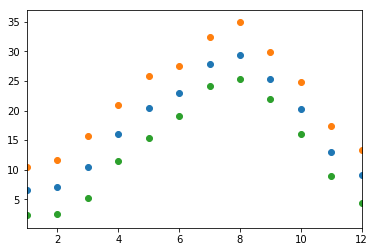

In [14]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), avdata)
subplot.scatter(range(1,13), maxdata)
subplot.scatter(range(1,13), mindata)